In [150]:
import pandas as pd
import datetime

In [151]:
url= "https://raw.githubusercontent.com/youyanggu/covid19_projections/master/infection_estimates/latest_all_estimates_states.csv"
url_usa = "https://raw.githubusercontent.com/youyanggu/covid19_projections/master/infection_estimates/latest_all_estimates_us.csv"

In [152]:
df_states = pd.read_csv(url)
df_usa = pd.read_csv(url_usa)

In [153]:
# makes it easier to graph
df_states = df_states.fillna(0)
df_states['date'] = pd.to_datetime(df_states['date'], format="%Y-%m-%d")
df_usa = df_usa.fillna(0)
df_usa['date'] = pd.to_datetime(df_usa['date'], format="%Y-%m-%d")

In [154]:
date = df_usa['date'].iloc[-1]
cases = df_usa['daily_positive_7day_ma'].iloc[-1]
tests = df_usa['daily_tests_7day_ma'].iloc[-1]
adj_pos_rate = df_usa['positivity_rate_7day_ma'].iloc[-1]

print(f'The report today is from {date:%Y-%m-%d} and the 7d MA is {cases:,} on {tests:,} tests \
with an adjusted positivity rate of {adj_pos_rate:.2%} data: covid19-projections.com')

The report today is from 2020-11-30 and the 7d MA is 158,214.0 on 1,745,950.0 tests with an adjusted positivity rate of 9.06% data: covid19-projections.com


In [148]:
df_states.to_csv('infectionEstimates.csv', index=False)
df_usa.to_csv('infectionEstimates_usa.csv', index=False)

In [149]:
df_usa.tail()

,date,total_cases,total_deaths,total_tests,daily_positive_7day_ma,daily_deaths_7day_ma,daily_tests_7day_ma,positivity_rate_orig_7day_ma,positivity_rate_7day_ma,prevalence_ratio_mean,...,current_infected_upper,perc_current_infected_mean,perc_current_infected_lower,perc_current_infected_upper,total_infected_mean,total_infected_lower,total_infected_upper,perc_total_infected_mean,perc_total_infected_lower,perc_total_infected_upper
287,2020-11-25,12581085,253211,184875024,172539.0,1643.86,1980190.0,0.094663,0.087133,3.24170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,2020-11-26,12706167,254530,186025251,164289.0,1550.71,1878970.0,0.095139,0.087436,3.37977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,2020-11-27,12901146,255904,188171507,164600.0,1481.00,1902830.0,0.093563,0.086503,3.36371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,2020-11-28,13054593,257119,189869839,160847.0,1438.57,1849590.0,0.093759,0.086964,3.42617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,2020-11-29,13188777,257920,191147018,158469.0,1425.57,1773100.0,0.096112,0.089373,3.44097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Viz for USA

In [78]:
import matplotlib.pyplot as plt
import numpy as np

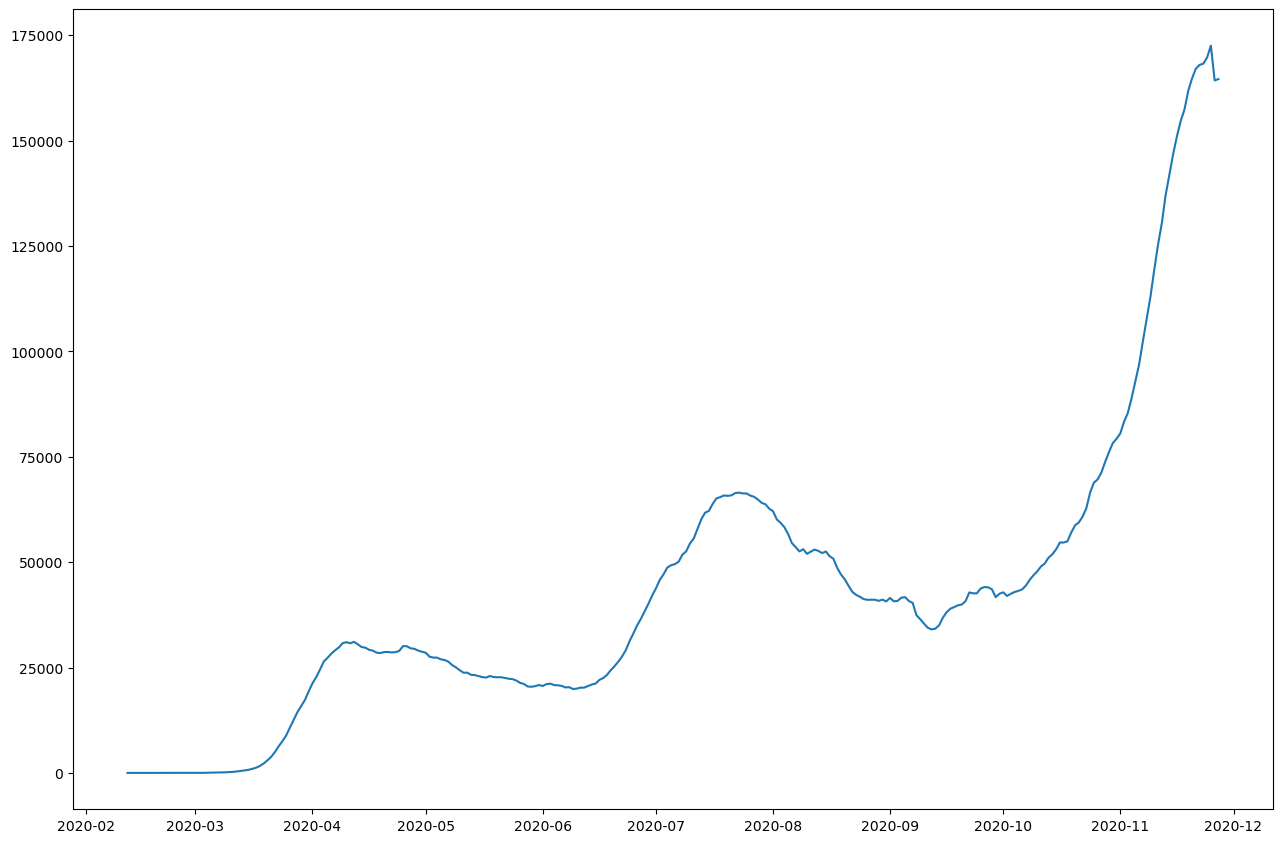

In [77]:
fig = plt.figure(figsize=(12,8),dpi=100)
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(df_usa['date'], df_usa['daily_positive_7day_ma'])

In [79]:
ymax = max(df_usa['daily_positive_7day_ma'])

In [82]:
ymax = max(df_usa['daily_positive_7day_ma'])
xpos = df_usa['daily_positive_7day_ma'].index(ymax)
xmax = x[xpos]

TypeError: 'RangeIndex' object is not callable

In [90]:
x1 = df_usa.loc[df_usa['date'].values()
y1 = df_usa.loc[df_usa['daily_positive_7day_ma'].values()

SyntaxError: invalid syntax (<ipython-input-90-aa1bfdf929d4>, line 2)

In [92]:
x = df_usa['date'].to_numpy() 
y = df_usa['daily_positive_7day_ma'].to_numpy()

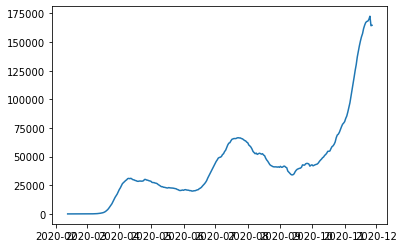

<Figure size 1200x800 with 0 Axes>

In [99]:
fig, ax = plt.subplots()
ax.plot(x,y)
fig = plt.figure(figsize=(12,8),dpi=100)

In [100]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:}, y={:}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x,y)


ValueError: Image size of 21660276x37516908 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

### Clustering

In [126]:
df_states.head()

,date,state,total_cases,total_deaths,total_tests,daily_positive_7day_ma,daily_deaths_7day_ma,daily_tests_7day_ma,positivity_rate_orig_7day_ma,positivity_rate_7day_ma,...,current_infected_upper,perc_current_infected_mean,perc_current_infected_lower,perc_current_infected_upper,total_infected_mean,total_infected_lower,total_infected_upper,perc_total_infected_mean,perc_total_infected_lower,perc_total_infected_upper
0,2020-02-29,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,8.35714,0.000008,0.000005,0.000011,5.57143,3.71429,8.35714,0.000008,0.000005,0.000011
1,2020-03-01,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,23.25000,0.000021,0.000014,0.000032,15.50000,10.33330,23.25000,0.000021,0.000014,0.000032
2,2020-03-02,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,42.60710,0.000039,0.000026,0.000058,28.40480,18.93650,42.60710,0.000039,0.000026,0.000058
3,2020-03-03,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,65.75000,0.000060,0.000040,0.000090,43.83330,29.22220,65.75000,0.000060,0.000040,0.000090
4,2020-03-04,AK,0,0,0,0.0,0.0,0.0,0.0,0.0,...,91.33570,0.000083,0.000055,0.000125,60.89050,40.59370,91.33570,0.000083,0.000055,0.000125


In [128]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [130]:
mask = (df['date'] > '2020-10-14') & (df['date'] <= '2020-11-14')

In [132]:
df_cluster_data = df.loc[mask]

In [133]:
scaler = StandardScaler()

In [136]:
df_cluster_data = df_cluster_data.drop('date',axis=1)

In [138]:
scaler.fit(df_cluster_data.drop('state',axis=1))

StandardScaler()

In [139]:
scaled_features = scaler.transform(df_cluster_data.drop('state',axis=1))

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['state'],
                                                    test_size=0.30)

ValueError: Found input variables with inconsistent numbers of samples: [1705, 15493]